In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/genetic_programming'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/gpolnel'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import friedmanchisquare, levene
import sys
import torch.nn as nn
from NEUROEVOLUTION.utils import drop_features, kfold, load_best_params, complete_params, seed, device, mean_cross_validation, extract_number, get_wilcoxon_p_values, color_wilcoxon
from NEUROEVOLUTION.gpolnel.utils.ffunctions import Ffunctions
from NEUROEVOLUTION.genetic_programming.gp_utils import gp_cross_validation
from NEUROEVOLUTION.geometric_semantic_genetic_programming.gsgp_utils import gsgp_cross_validation
from NEUROEVOLUTION.neuroevolution_gpol_based.ne_utils import ne_cross_validation
from NEUROEVOLUTION.neuroevolution_augmentingtopologies.neat_utils import neat_cross_validation
from NEUROEVOLUTION.neural_network_backpropagation.nn_utils import nn_cross_validation

In [2]:
target = 'protein'
file_path_X = '../datamart/data_project_nel.csv'
file_path_y = '../datamart/y_' + f'{target}'+ '.csv'
X = pd.read_csv(file_path_X)
X = drop_features(X)
y = pd.read_csv(file_path_y)[f'{target}'+'_percent']


batch_size = X.shape[0]
shuffle = True
ffunction = Ffunctions('rmse')
loss_fn = nn.MSELoss()

In [3]:
gp_best_params = load_best_params('../genetic_programming/best_params/' +f'{target}'+'-best_params_final.pkl')
gp_best_params = complete_params(gp_best_params)

In [4]:
gp_score = gp_cross_validation(X, y, batch_size, shuffle, kfold, gp_best_params['initializer'], gp_best_params['ps'], gp_best_params['n_iter'],  
                               gp_best_params['sspace'],  gp_best_params['selection_method'], gp_best_params['mutation_prob'], 
                               gp_best_params['mutation_method'], gp_best_params['xo_prob'],gp_best_params['xo_method'], 
                               gp_best_params['has_elitism'], gp_best_params['allow_reproduction'], log_path_cv = 'logs/'+ f'{target}'+ '/gp_cv.csv',
                               log_path_train = 'logs/'+ f'{target}'+ '/gp_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1)

cv_score: 0.14962454512371098


In [5]:
gsgp_best_params = load_best_params('../geometric_semantic_genetic_programming/best_params/' +f'{target}'+'-best_params_final.pkl')
gsgp_best_params = complete_params(gsgp_best_params)

In [6]:
gsgp_score = gsgp_cross_validation(X, y, batch_size, shuffle, kfold, gsgp_best_params['initializer'], gsgp_best_params['ps'], gsgp_best_params['n_iter'],  
                               gsgp_best_params['sspace'],  gsgp_best_params['selection_method'], gsgp_best_params['mutation_prob'], 
                               gsgp_best_params['mutation_method'], gsgp_best_params['xo_prob'],gsgp_best_params['xo_method'], 
                               gsgp_best_params['has_elitism'], gsgp_best_params['allow_reproduction'], log_path_cv ='logs/'+ f'{target}'+ '/gsgp_cv.csv',
                               log_path_train ='logs/'+ f'{target}'+ '/gsgp_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1)

cv_score: 0.18744763056881272


In [7]:
ne_best_params = load_best_params('../neuroevolution_gpol_based/best_params/' +f'{target}'+'-best_params_final.pkl')
ne_best_params = complete_params(ne_best_params)

In [8]:
ne_score = ne_cross_validation(X, y, batch_size, shuffle, kfold, ne_best_params['initializer'], ne_best_params['ps'], ne_best_params['n_iter'],  
                               ne_best_params['sspace'],  ne_best_params['selection_method'], ne_best_params['mutation_prob'], 
                               ne_best_params['mutation_method'], ne_best_params['xo_prob'],ne_best_params['xo_method'], 
                               ne_best_params['has_elitism'], ne_best_params['allow_reproduction'], log_path_cv ='logs/'+ f'{target}'+ '/ne_cv.csv',
                               log_path_train = 'logs/'+f'{target}'+ '/ne_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1) #

cv_score: 0.5821528859704284


In [9]:
neat_best_params = load_best_params('../neuroevolution_augmentingtopologies/best_params/' +f'{target}'+'-best_params_final.pkl')

In [10]:
neat_score = neat_cross_validation( X, y, config_path = '../neuroevolution_augmentingtopologies/' + neat_best_params['config_file'] , kf=kfold, n_iter=neat_best_params['n_iter'],  train_log_path= 'logs/'+f'{target}'+ '/neat_train.csv', cv_log_path= 'logs/'+f'{target}'+ '/neat_cv.csv', id=1)

0.147537018928577


In [11]:
nn_best_params = load_best_params('../neural_network_backpropagation/best_params/' +f'{target}'+'-best_params_final.pkl')

In [12]:
nn_best_params['model']

Sequential(
  (0): Linear(in_features=12, out_features=2, bias=True)
  (linear): Linear(in_features=2, out_features=9, bias=True)
  (sigmoid2): Sigmoid()
  (output): Linear(in_features=9, out_features=1, bias=True)
)

In [13]:
model = nn.Sequential(nn.Linear( 12, 2))
model.add_module('lin',nn.Linear( 2, 9))
model.add_module('relu1', nn.Sigmoid())
model.add_module('out', nn.Linear(9, 1))
nn_score = nn_cross_validation(X, y, model=model, cv_log_path ='logs/'+ f'{target}'+ '/nn_cv.csv', train_log_path='logs/'+ f'{target}'+ '/nn_train.csv', loss_fn=loss_fn, optimizer_name = nn_best_params['optimizer_name'], lr = nn_best_params['lr'], weight_decay=nn_best_params['weight_decay'], n_epochs = nn_best_params['n_epochs'], batch_size= nn_best_params['batch_size'],  kf=kfold, id=1 )

0.13805076


In [14]:
mean_score = mean_cross_validation(X,y,log_path_cv ='logs/'+ f'{target}'+ '/mean_cv.csv', id=1)

cv_score: 0.1489864227680281


In [25]:
gp_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/gp_cv.csv', sep=';')['val_score'].apply(extract_number)
gsgp_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/gsgp_cv.csv', sep=';')['val_score'].apply(extract_number)
ne_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/ne_cv.csv', sep=';')['val_score'].apply(extract_number)

neat_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/neat_cv.csv', sep=';')['val_score']
nn_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/nn_cv.csv', sep=';')['val_score'].apply(extract_number)
mean_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/mean_cv.csv', sep=';')['val_score']

In [26]:
data = {
    'nn_backprop': nn_log_cv,
    'gp': gp_log_cv,
    'mean': mean_log_cv,
    'neat': neat_log_cv,
    
    'gsgp': gsgp_log_cv,
    'ne_gpolnel': ne_log_cv
}

In [27]:
wilcoxon_p_values = get_wilcoxon_p_values(data)
wilcoxon_p_values.style.applymap(color_wilcoxon).format("{:.2f}")

,nn_backprop,gp,mean,neat,gsgp,ne_gpolnel
nn_backprop,0.00,1.00,1.00,1.00,1.00,1.00
gp,0.00,0.00,0.19,0.05,1.00,1.00
mean,0.00,0.84,0.00,0.12,1.00,1.00
neat,0.00,0.96,0.90,0.00,1.00,1.00
gsgp,0.00,0.00,0.00,0.00,0.00,1.00
ne_gpolnel,0.00,0.00,0.00,0.00,0.00,0.00


In [28]:
print(friedmanchisquare(gp_log_cv, gsgp_log_cv, ne_log_cv, neat_log_cv, nn_log_cv, mean_log_cv))
print(levene(gp_log_cv, gsgp_log_cv, ne_log_cv, neat_log_cv, nn_log_cv, mean_log_cv))


FriedmanchisquareResult(statistic=45.88571428571427, pvalue=9.581903851109485e-09)
LeveneResult(statistic=6.641506997806204, pvalue=6.930610708797957e-05)


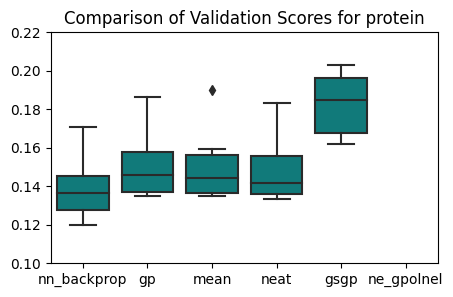

In [29]:
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))
df_long = df.melt(var_name='Method', value_name='Score')
plt.figure(figsize=(5, 3))
sns.boxplot(x='Method', y='Score', data=df_long, color='darkcyan')
plt.title('Comparison of Validation Scores for '+ f'{target}')
plt.ylabel('')
plt.xlabel('')
plt.ylim(0.10, 0.22)
plt.show()